In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import tensorflow as tf
import os
import time
import scikitplot as skplt
from tqdm.notebook import tqdm_notebook
from tqdm import tqdm
tqdm_notebook.pandas()

In [19]:
# read the complete data
filename = os.path.join(os.path.dirname(__name__), "DataFiles\original_predicted_full_dataset.tsv")
Complete_data = pd.read_csv(filename,delimiter='\t',low_memory=False)

In [20]:
Complete_data.head(2)

,film_id,issue_label,openingWeekend,weekendEarning,budget,GrossUSCanada,GrossWorldwide,officialSitesCount,officialSites,productionCompanyCount,...,longitude,continent,genre_list,coo_list,budget_est,budget_label,averageRating,numVotes,coo_continent,film_era
0,tt0120737,others,"Dec 23, 2001",47211490,"$93,000,000 (estimated)",316115420,884041698,1,Official Facebook,3,...,-41.2887953,Oceania,Action,New Zealand,93000000.0,50M - 100M,8.9,2006369,Oceania,Streaming Era
1,tt0120737,others,"Dec 23, 2001",47211490,"$93,000,000 (estimated)",316115420,884041698,1,Official Facebook,3,...,-41.2887953,Oceania,Action,United States,93000000.0,50M - 100M,8.9,2006369,North America,Streaming Era


In [21]:
# remove the 2024 data from the dataset

merged_data = Complete_data.copy()
merged_data = merged_data[~merged_data['decades'].isna()]

In [22]:
# Remove movies with others category

merged_data = merged_data[merged_data['issue_label'] != 'others']

In [23]:
print(len(merged_data))
Complete_data.tail()

228273


,film_id,issue_label,openingWeekend,weekendEarning,budget,GrossUSCanada,GrossWorldwide,officialSitesCount,officialSites,productionCompanyCount,...,longitude,continent,genre_list,coo_list,budget_est,budget_label,averageRating,numVotes,coo_continent,film_era
725610,tt9916362,others,NaN,0,"€2,500,000 (estimated)",0,317907,0,NaN,3,...,36.9140589,Europe,Drama,France,2500000.0,2M - 5M,6.4,5781,Europe,Streaming Era
725611,tt9916362,others,NaN,0,"€2,500,000 (estimated)",0,317907,0,NaN,3,...,36.9140589,Europe,Drama,Argentina,2500000.0,2M - 5M,6.4,5781,South America,Streaming Era
725612,tt9916362,others,NaN,0,"€2,500,000 (estimated)",0,317907,0,NaN,3,...,36.9140589,Europe,History,Spain,2500000.0,2M - 5M,6.4,5781,Europe,Streaming Era
725613,tt9916362,others,NaN,0,"€2,500,000 (estimated)",0,317907,0,NaN,3,...,36.9140589,Europe,History,France,2500000.0,2M - 5M,6.4,5781,Europe,Streaming Era
725614,tt9916362,others,NaN,0,"€2,500,000 (estimated)",0,317907,0,NaN,3,...,36.9140589,Europe,History,Argentina,2500000.0,2M - 5M,6.4,5781,South America,Streaming Era


### create list countries

In [24]:
countryOfOrigin_list = list(merged_data.coo_list.unique())
print(len(countryOfOrigin_list))

165


In [25]:
# Create temp dataframe to check number of total movies in selected countries
film_count_data = pd.DataFrame(countryOfOrigin_list, columns=['country_name'])
film_count_data.tail(2)

,country_name
163,Yemen
164,Gabon


### Create function to select top 100 movies as per average ratings

In [26]:
# create list of movies as per max amongst row
output_result = pd.DataFrame()
final_list = []
for country in tqdm(countryOfOrigin_list):
    # Filter merged data for country
    country_filter = merged_data[merged_data['coo_list']==country]
    filter_data = country_filter[['film_id','averageRating']].reset_index()
    filter_data = filter_data.drop(['index'], axis=1)
    filter_data.drop_duplicates(inplace=True)                                              # drop duplicates
    filter_data.sort_values(by="averageRating", ascending=False, inplace=True)             # Sort by average rating
    filter_data = filter_data.reset_index()
    filter_data = filter_data.drop(['index'], axis=1)
    filter_len = len(filter_data)
        #res = list(temp_data[temp_data['releaseYear']==year].min(axis=1))[0]
    if filter_len > 100:
        top100data = list(filter_data.loc[:100,:]['film_id'])
    else:
        top100data = list(filter_data.loc[:filter_len,:]['film_id'])
    temp_df = country_filter[country_filter['film_id'].isin(top100data)]
    if output_result.empty:
        output_result = temp_df.loc[:,:]
    else:
        output_result = pd.concat([output_result, temp_df], axis=0)
    final_list.extend(top100data)
    del top100data


100%|██████████| 165/165 [00:04<00:00, 37.06it/s]


In [27]:
print(len(output_result))
print(len(output_result.film_id.unique()))

28470
5555


In [28]:
output_result = output_result.reset_index()
output_result = output_result.drop(['index'], axis=1)
output_result.head(3)

,film_id,issue_label,openingWeekend,weekendEarning,budget,GrossUSCanada,GrossWorldwide,officialSitesCount,officialSites,productionCompanyCount,...,longitude,continent,genre_list,coo_list,budget_est,budget_label,averageRating,numVotes,coo_continent,film_era
0,tt0114369,crime and corruption,"Sep 24, 1995",13949807,"$33,000,000 (estimated)",100125643,327333559,1,Official Facebook,3,...,34.0480643,North America,Crime,United States,33000000.0,10M - 50M,8.6,1798296,North America,Blockbuster Era
1,tt0114369,crime and corruption,"Sep 24, 1995",13949807,"$33,000,000 (estimated)",100125643,327333559,1,Official Facebook,3,...,34.0480643,North America,Drama,United States,33000000.0,10M - 50M,8.6,1798296,North America,Blockbuster Era
2,tt0114369,crime and corruption,"Sep 24, 1995",13949807,"$33,000,000 (estimated)",100125643,327333559,1,Official Facebook,3,...,34.0480643,North America,Mystery,United States,33000000.0,10M - 50M,8.6,1798296,North America,Blockbuster Era


In [18]:
output_result.to_csv(os.path.join(os.path.dirname(__name__), "100TopFilmsByCountry_Original.tsv"), sep='\t', index=False)

### Create Trend Graph for Social Issues over Era

In [11]:
# read the summary data
filename = os.path.join(os.path.dirname(__name__), "Datafiles\\100TopFilmsByCountry_Original.tsv")
top100_data = pd.read_csv(filename,delimiter='\t',low_memory=False)

In [13]:
top100_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28422 entries, 0 to 28421
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   film_id                 28422 non-null  object 
 1   issue_label             28422 non-null  object 
 2   openingWeekend          7105 non-null   object 
 3   weekendEarning          28422 non-null  int64  
 4   budget                  28422 non-null  object 
 5   GrossUSCanada           28422 non-null  int64  
 6   GrossWorldwide          28422 non-null  int64  
 7   officialSitesCount      28422 non-null  int64  
 8   officialSites           16295 non-null  object 
 9   productionCompanyCount  28422 non-null  int64  
 10  productionCompanies     27449 non-null  object 
 11  languageCount           28422 non-null  int64  
 12  languages               28222 non-null  object 
 13  releaseDate             28347 non-null  object 
 14  releaseLocation         28347 non-null

In [52]:
top100_data.head()

,film_id,issue_label,openingWeekend,weekendEarning,budget,GrossUSCanada,GrossWorldwide,officialSitesCount,officialSites,productionCompanyCount,...,lattitude,longitude,continent,genre_list,coo_list,budget_est,budget_label,averageRating,numVotes,coo_continent
0,tt0050083,socioeconomic inequality,NaN,0,"$350,000 (estimated)",0,2667,0,NaN,1,...,-74.00149387,40.71427865,North America,Crime,United States,350000.0,< 1M,9.0,864616,North America
1,tt0050083,socioeconomic inequality,NaN,0,"$350,000 (estimated)",0,2667,0,NaN,1,...,-74.00149387,40.71427865,North America,Drama,United States,350000.0,< 1M,9.0,864616,North America
2,tt0050083,socioeconomic inequality,NaN,0,"$350,000 (estimated)",0,2667,0,NaN,1,...,-118.4125118,34.05201125,North America,Crime,United States,350000.0,< 1M,9.0,864616,North America
3,tt0050083,socioeconomic inequality,NaN,0,"$350,000 (estimated)",0,2667,0,NaN,1,...,-118.4125118,34.05201125,North America,Drama,United States,350000.0,< 1M,9.0,864616,North America
4,tt0050083,socioeconomic inequality,NaN,0,"$350,000 (estimated)",0,2667,0,NaN,1,...,-74.0060152,40.7127281,North America,Crime,United States,350000.0,< 1M,9.0,864616,North America


In [56]:
sample_trial = Complete_data[['film_id','issue_label','coo_list','film_era']].reset_index()
sample_trial = sample_trial.drop(['index'], axis=1)  
sample_trial.drop_duplicates(inplace=True)

In [57]:
print("Total Count of Data: ",len(sample_trial))
print("Total Count of unique Films: ",len(sample_trial.film_id.unique()))

Total Count of Data:  145054
Total Count of unique Films:  113915


In [58]:
sample_trial.issue_label.value_counts()

others                           99713
socioeconomic inequality         11287
crime and corruption             11006
war or revolution                 6641
racism or discrimination          4660
feminism                          4339
drugs and alcoholism              1973
health and disease                1520
lgbtq                             1266
disability                         957
immigration or refugee crisis      840
political issues                   620
environmental issues               232
Name: issue_label, dtype: int64

In [59]:
sample_trial = sample_trial[sample_trial['issue_label'] != 'others']
print("Total Count of Data: ",len(sample_trial))
print("Total Count of unique Films: ",len(sample_trial.film_id.unique()))

Total Count of Data:  45341
Total Count of unique Films:  35766


In [60]:
sample_trial.film_era.value_counts(normalize=False)

Streaming Era              28594
Blockbuster Era             7734
New Hollywood Era           4948
Golden Age of Hollywood     3679
Transition to Sound          287
Silent Era                    98
Name: film_era, dtype: int64

In [42]:
len(sample_trial[sample_trial['film_era']=='Streaming Era'].coo_list.unique())

156

In [88]:
sample_era = sample_trial[['film_id','issue_label','film_era']].reset_index()
sample_era = sample_era.drop(['index'], axis=1)  
sample_era.drop_duplicates(inplace=True)

In [89]:
sample_era = sample_era.groupby(['issue_label', 'film_era'])['film_id'].count().reset_index()
sample_era

,issue_label,film_era,film_id
0,crime and corruption,Blockbuster Era,1614
1,crime and corruption,Golden Age of Hollywood,906
2,crime and corruption,New Hollywood Era,967
3,crime and corruption,Silent Era,18
4,crime and corruption,Streaming Era,5292
...,...,...,...
67,war or revolution,Golden Age of Hollywood,650
68,war or revolution,New Hollywood Era,703
69,war or revolution,Silent Era,7
70,war or revolution,Streaming Era,2612


In [94]:
era_order = [
    'Silent Era', 
    'Transition to Sound', 
    'Golden Age of Hollywood', 
    'New Hollywood Era', 
    'Blockbuster Era', 
    'Streaming Era'
]

In [96]:
sample_era['film_era'] = pd.Categorical(sample_era['film_era'], categories=era_order, ordered=True)
sample_era = sample_era.sort_values(by=['issue_label', 'film_era'])
sample_era

,issue_label,film_era,film_id
3,crime and corruption,Silent Era,18
5,crime and corruption,Transition to Sound,40
1,crime and corruption,Golden Age of Hollywood,906
2,crime and corruption,New Hollywood Era,967
0,crime and corruption,Blockbuster Era,1614
...,...,...,...
71,war or revolution,Transition to Sound,41
67,war or revolution,Golden Age of Hollywood,650
68,war or revolution,New Hollywood Era,703
66,war or revolution,Blockbuster Era,786


In [97]:
sample_era['Pct Change'] = sample_era.groupby('issue_label')['film_id'].pct_change() * 100

In [113]:
sample_era['total_movies_in_era'] = sample_era.apply(lambda x: sample_era.groupby(['film_era'])['film_id'].sum()[x.film_era], axis=1)

In [115]:
sample_era['proportion'] = sample_era['film_id'] / sample_era['total_movies_in_era']

In [98]:
sample_era['Pct Change'] = sample_era['Pct Change'].fillna(0)

In [116]:
sample_era

,issue_label,film_era,film_id,Pct Change,total_movies_in_era,proportion
3,crime and corruption,Silent Era,18,0.000000,98,0.183673
5,crime and corruption,Transition to Sound,40,122.222222,280,0.142857
1,crime and corruption,Golden Age of Hollywood,906,2165.000000,3504,0.258562
2,crime and corruption,New Hollywood Era,967,6.732892,3891,0.248522
0,crime and corruption,Blockbuster Era,1614,66.907963,6038,0.267307
...,...,...,...,...,...,...
71,war or revolution,Transition to Sound,41,485.714286,280,0.146429
67,war or revolution,Golden Age of Hollywood,650,1485.365854,3504,0.185502
68,war or revolution,New Hollywood Era,703,8.153846,3891,0.180673
66,war or revolution,Blockbuster Era,786,11.806543,6038,0.130176


In [125]:
color_palette = {
    'crime and corruption': 'blue',
    'disability': 'lightblue',
    'drugs and alcoholism': 'orange',
    'environmental issues': 'green',
    'feminism': 'pink',
    'health and disease': 'purple',
    'immigration or refugee crisis': 'red',
    'lgbtq': 'brown',
    'political issues': 'cyan',
    'racism or discrimination': 'magenta',
    'socioeconomic inequality': 'darkgreen',
    'war or revolution': 'gray'
}

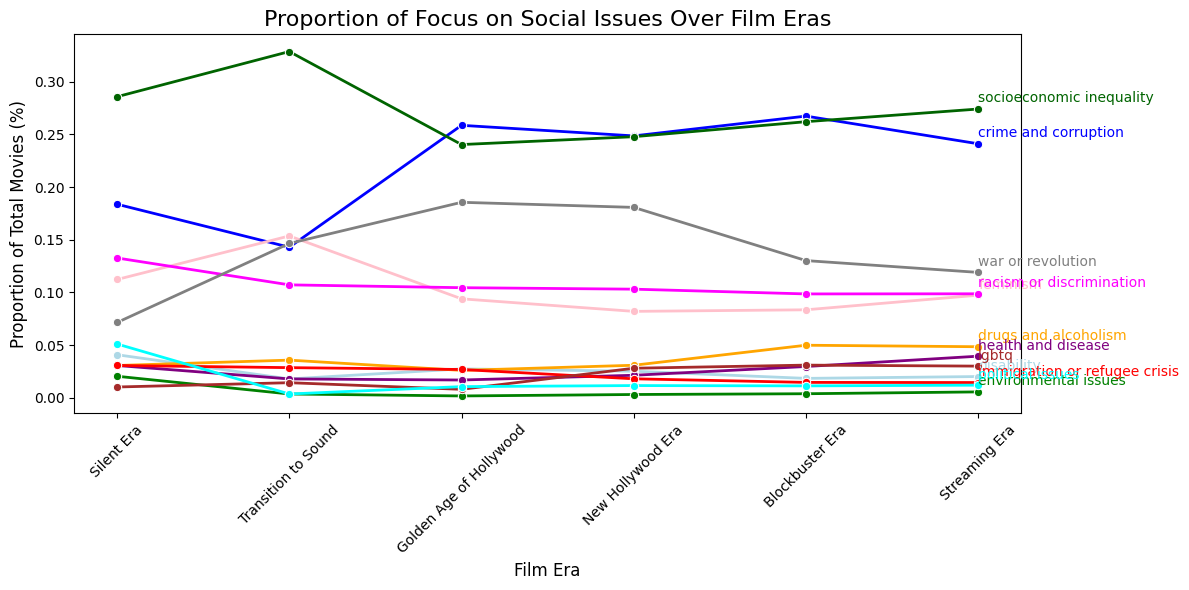

In [155]:
# Set plot size
plt.figure(figsize=(12, 6))

# Create a line plot to track the proportion of focus on each social issue over time
sns.lineplot(x='film_era', y='proportion', hue='issue_label',palette=color_palette, data=sample_era, marker="o", linewidth=2)

# Add title and labels
plt.title('Proportion of Focus on Social Issues Over Film Eras', fontsize=16)
plt.xlabel('Film Era', fontsize=12)
plt.ylabel('Proportion of Total Movies (%)', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Annotate each line with its corresponding issue label at the last point
for issue in sample_era['issue_label'].unique():
    last_point = sample_era[sample_era['issue_label'] == issue].iloc[-1]
    plt.text(x=last_point['film_era'], 
             y=last_point['proportion'] + 0.01, 
             s=issue, 
             color=color_palette[issue], 
             ha='left', 
             va='center')
    
# Display the legend and show the plot
plt.legend(title='Social Issue', bbox_to_anchor=(1.05, 1), loc='upper left').set_visible(False)

plt.tight_layout()
plt.show()

In [118]:
sample_era.issue_label.unique()

array(['crime and corruption', 'disability', 'drugs and alcoholism',
       'environmental issues', 'feminism', 'health and disease',
       'immigration or refugee crisis', 'lgbtq', 'political issues',
       'racism or discrimination', 'socioeconomic inequality',
       'war or revolution'], dtype=object)

In [119]:
low_issues = ['disability','environmental issues','health and disease','lgbtq', 'drugs and alcoholism','immigration or refugee crisis']

In [120]:
sample_small_era = sample_era[sample_era['issue_label'].isin(low_issues)]

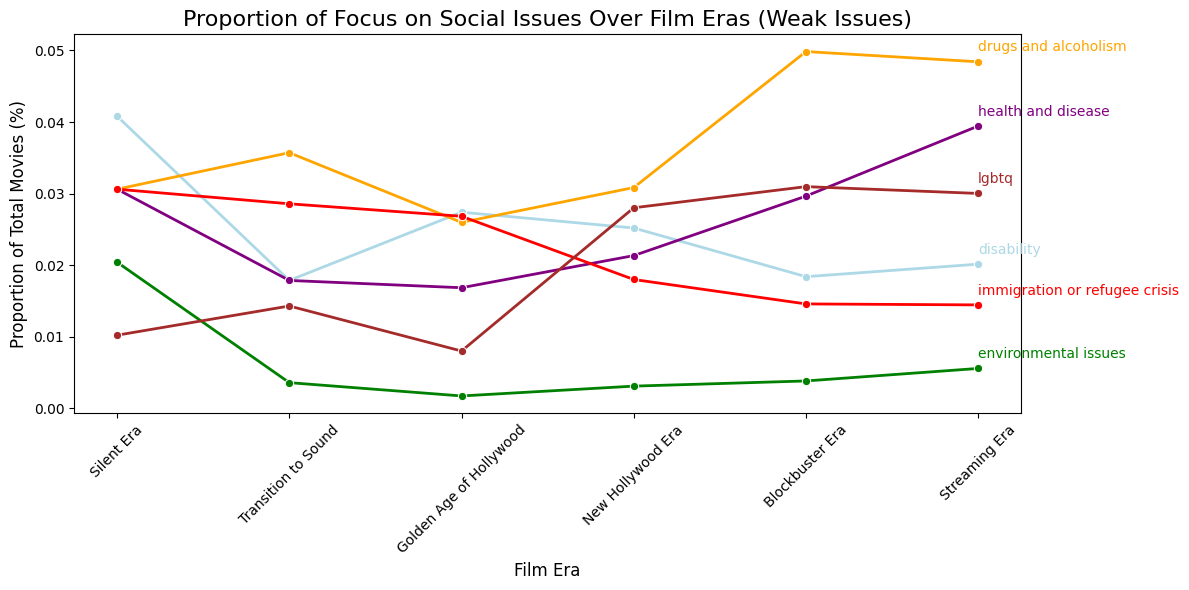

In [156]:
# Set plot size
fig, ax = plt.subplots(figsize=(12, 6))

# Create a line plot to track the proportion of focus on each social issue over time
sns.lineplot(x='film_era', y='proportion', hue='issue_label',palette=color_palette, data=sample_small_era, marker="o", linewidth=2,ax=ax)
  
# Add title and labels
plt.title('Proportion of Focus on Social Issues Over Film Eras (Weak Issues)', fontsize=16)
plt.xlabel('Film Era', fontsize=12)
plt.ylabel('Proportion of Total Movies (%)', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

for issue in sample_small_era['issue_label'].unique():
    last_point = sample_small_era[sample_small_era['issue_label'] == issue].iloc[-1]
    plt.text(x=last_point['film_era'], 
             y=last_point['proportion'] + 0.002, 
             s=issue, 
             color=color_palette[issue], 
             ha='left', 
             va='center')
    
# Display the legend and show the plot
plt.legend(title='Social Issue', bbox_to_anchor=(1.05, 1), loc='upper left').set_visible(False)
plt.tight_layout()
plt.show()

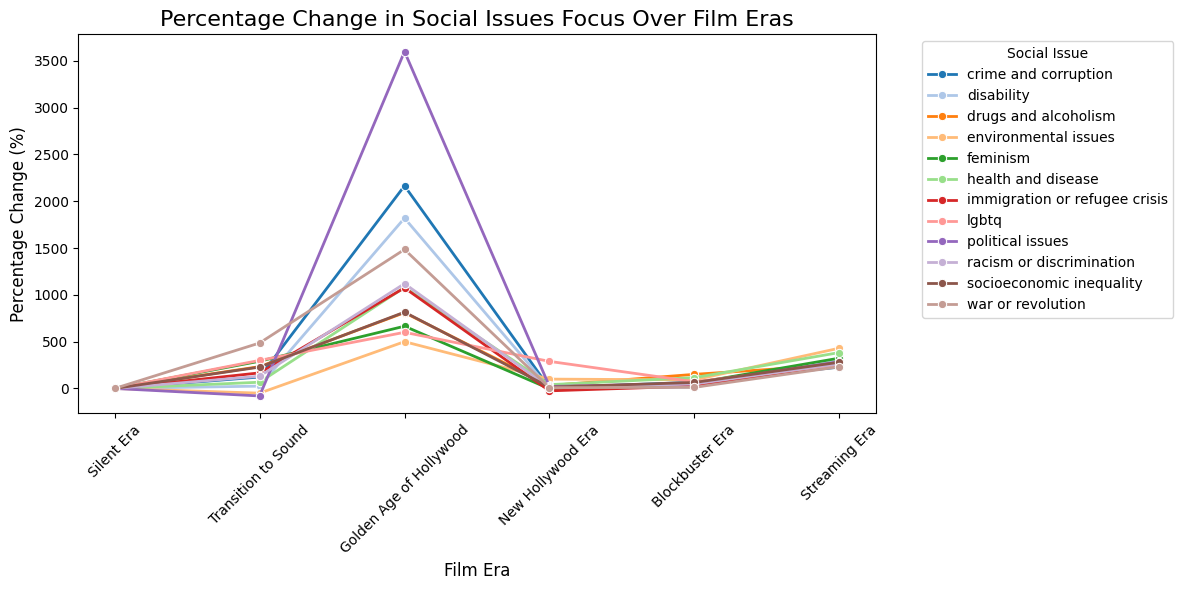

In [109]:

# Set plot size
plt.figure(figsize=(12, 6))

# Create a line plot to track the percentage change of each social issue over time
sns.lineplot(x='film_era', y='Pct Change', hue='issue_label',palette="tab20", data=sample_era, marker="o", linewidth=2)

# Add title and labels
plt.title('Percentage Change in Social Issues Focus Over Film Eras', fontsize=16)
plt.xlabel('Film Era', fontsize=12)
plt.ylabel('Percentage Change (%)', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Display the legend and show the plot
plt.legend(title='Social Issue', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()